In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import numpy as np

from linearmodels.panel import PanelOLS
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# All OLS




In [ ]:
#decide which df to use
df = pd.read_csv("Dataframes/economic_story_regression.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]
X_var_names = ["Revenue - Actual", "Earnings Per Share - Actual Surprise", "Enterprise Value", "Earnings Per Share - Actual Surprise AbsVals", "Recommendation change", "Recommendation - Mean (1-5).1", "Recommendation - Mean (1-5)"]
df = df.drop(["Earnings Per Share - Actual Surprise"], axis=1)
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df

,Instrument,Date,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5),Recommendation change,...,Price Target - Standard Deviation,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
0,AVY.N,2013-01-01,11.178,Materials,3.625620,3.426001e+09,1.532200e+09,7.0,3.00000,0.00000,...,2.44949,0.799347,10.637479,207295.0,-1,22.538500,0.166000,0.359537,76.666667,7.733333
1,AVY.N,2013-04-01,2.482,Materials,2.046169,4.309428e+09,1.498900e+09,7.0,2.87500,-0.12500,...,3.92272,0.895787,24.148726,0.0,-1,23.468125,0.143750,0.360572,81.666667,7.533333
2,AVY.N,2013-07-01,1.068,Materials,1.551601,4.258229e+09,1.552300e+09,8.0,2.87500,0.00000,...,4.30946,0.906078,-0.054218,0.0,-1,24.099219,0.125625,0.463789,81.566667,7.233333
3,AVY.N,2013-10-01,8.095,Materials,2.775994,4.273414e+09,1.504900e+09,7.0,2.62500,-0.25000,...,3.45230,0.903176,2.467620,236291.0,-1,19.740938,0.125806,0.441854,76.933333,6.933333
4,AVY.N,2014-01-01,1.471,Materials,3.204412,4.877168e+09,1.583900e+09,8.0,2.33333,-0.29167,...,3.42555,0.920659,16.003852,157761.0,-1,19.563770,0.126230,0.465460,80.933333,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,POOL.OQ,2021-10-01,17.194,Retailing,2.836295,1.742020e+10,1.411448e+09,8.0,2.30000,0.00000,...,50.48823,3.684400,-5.130322,157740.0,-1,43.036308,0.140755,0.382645,69.900000,4.200000
19197,POOL.OQ,2022-01-01,40.267,Retailing,3.269867,2.268979e+10,1.035557e+09,8.0,2.30000,0.00000,...,41.33833,4.504382,30.489705,82349.0,-1,52.695806,0.467234,0.380946,63.133333,3.800000
19198,POOL.OQ,2022-04-01,34.342,Retailing,6.630736,1.696712e+10,1.412650e+09,9.0,2.00000,-0.30000,...,37.49206,3.422880,-25.160664,290897.0,-1,50.457581,1.394118,0.495588,57.866667,3.600000
19199,POOL.OQ,2022-07-01,1.503,Retailing,3.625249,1.405795e+10,2.055818e+09,9.0,2.20000,0.20000,...,57.57373,2.749481,-21.661570,185584.0,-1,49.861562,2.885882,0.423045,56.100000,3.566667


#### OLS Regression

C:\Users\alexa\AppData\Local\Temp\ipykernel_204\4031068830.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = for_cm.corr()


<AxesSubplot: >

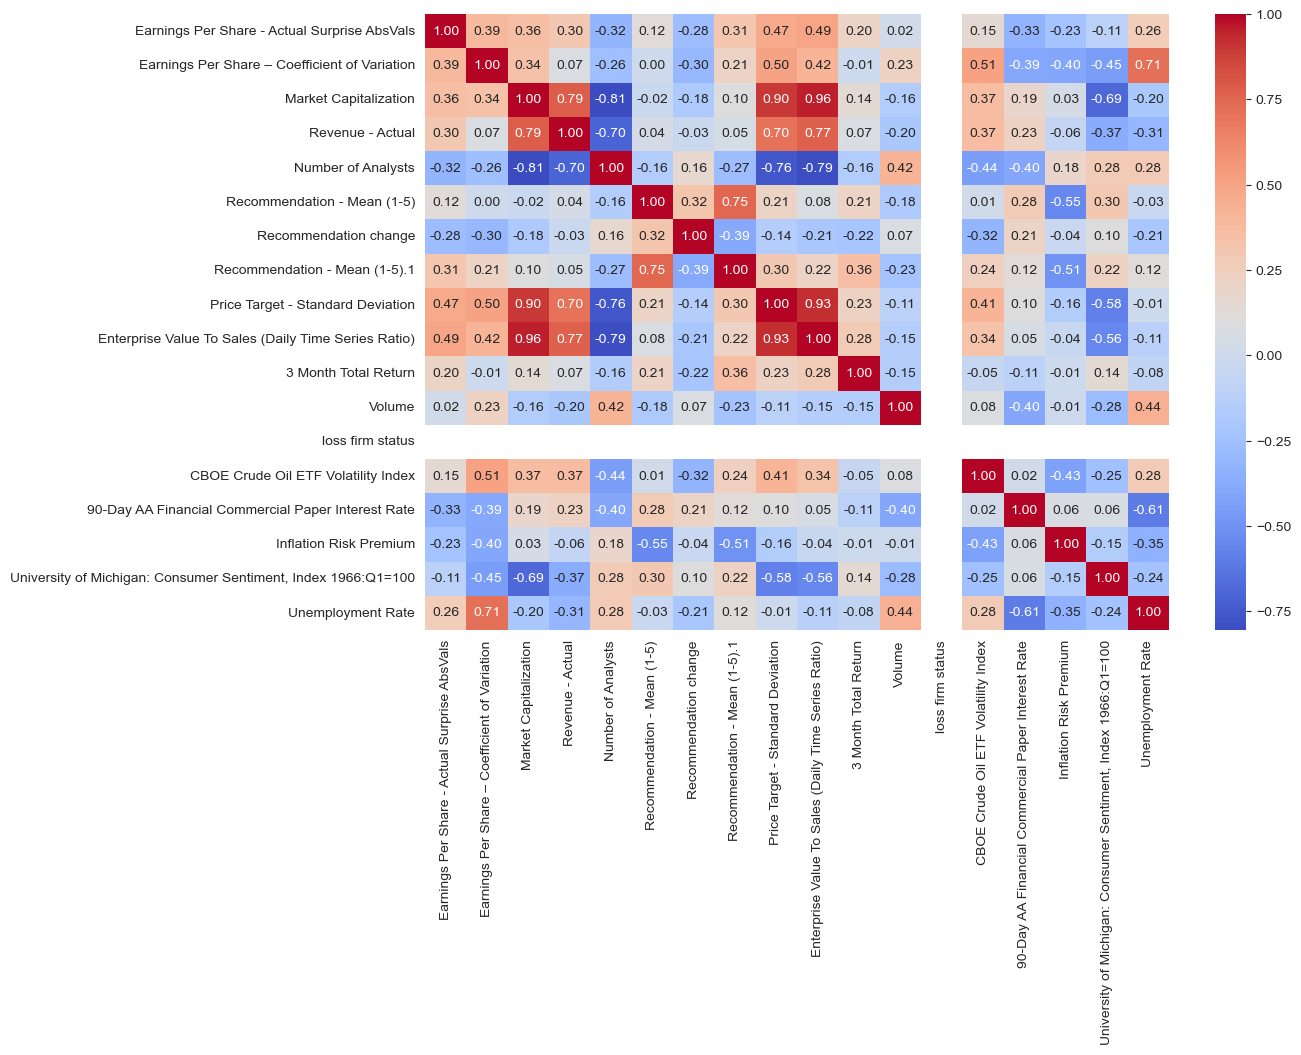

In [16]:
#for_rf = df_accuracy_new.iloc[:25,:]
for_cm = df[df['Instrument'] == 'AAPL.OQ']

corr_matrix = for_cm.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Rescaling the variables

In [17]:
n = 4
rescale = df.iloc[:, n:].copy()  # select columns starting from the (n+1)-th column

scaler = MinMaxScaler()

for col in rescale.columns:
    if rescale[col].dtype != "object":
        rescale[col] = scaler.fit_transform(rescale[col].values.reshape(-1, 1))

rescale

,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5),Recommendation change,Recommendation - Mean (1-5).1,Price Target - Standard Deviation,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
0,0.385569,0.001166,0.065123,0.125000,0.742857,0.538462,0.666667,0.002079,0.027195,0.298034,0.001183,0.0,0.058434,0.015981,0.552998,0.480156,0.443262
1,0.384977,0.001471,0.064917,0.125000,0.696428,0.480770,0.666667,0.003330,0.027308,0.340793,0.000000,0.0,0.069092,0.010593,0.555632,0.596887,0.421986
2,0.384792,0.001453,0.065247,0.145833,0.696428,0.538462,0.625000,0.003658,0.027321,0.264198,0.000000,0.0,0.076327,0.006205,0.818318,0.594553,0.390071
3,0.385251,0.001459,0.064955,0.125000,0.603571,0.423078,0.625000,0.002930,0.027317,0.272179,0.001348,0.0,0.026361,0.006249,0.762495,0.486381,0.358156
4,0.385411,0.001667,0.065443,0.145833,0.495236,0.403846,0.541667,0.002908,0.027338,0.315017,0.000900,0.0,0.024330,0.006351,0.822572,0.579767,0.329787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,0.385273,0.006004,0.064377,0.145833,0.482857,0.538462,0.433333,0.042855,0.030598,0.248134,0.000900,0.0,0.293433,0.009868,0.611807,0.322179,0.067376
19197,0.385436,0.007826,0.062055,0.145833,0.482857,0.538462,0.433333,0.035088,0.031566,0.360861,0.000470,0.0,0.404175,0.088919,0.607483,0.164202,0.024823
19198,0.386695,0.005848,0.064385,0.166667,0.371428,0.400001,0.433333,0.031824,0.030290,0.184744,0.001660,0.0,0.378514,0.313346,0.899246,0.041245,0.003546
19199,0.385569,0.004842,0.068358,0.166667,0.445714,0.630770,0.333333,0.048869,0.029495,0.195817,0.001059,0.0,0.371681,0.674548,0.714626,0.000000,0.000000


In [18]:
rescale = pd.concat([df.iloc[:,:n], rescale], axis=1)
rescale

,Instrument,Date,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5),Recommendation change,...,Price Target - Standard Deviation,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
0,AVY.N,2013-01-01,11.178,Materials,0.385569,0.001166,0.065123,0.125000,0.742857,0.538462,...,0.002079,0.027195,0.298034,0.001183,0.0,0.058434,0.015981,0.552998,0.480156,0.443262
1,AVY.N,2013-04-01,2.482,Materials,0.384977,0.001471,0.064917,0.125000,0.696428,0.480770,...,0.003330,0.027308,0.340793,0.000000,0.0,0.069092,0.010593,0.555632,0.596887,0.421986
2,AVY.N,2013-07-01,1.068,Materials,0.384792,0.001453,0.065247,0.145833,0.696428,0.538462,...,0.003658,0.027321,0.264198,0.000000,0.0,0.076327,0.006205,0.818318,0.594553,0.390071
3,AVY.N,2013-10-01,8.095,Materials,0.385251,0.001459,0.064955,0.125000,0.603571,0.423078,...,0.002930,0.027317,0.272179,0.001348,0.0,0.026361,0.006249,0.762495,0.486381,0.358156
4,AVY.N,2014-01-01,1.471,Materials,0.385411,0.001667,0.065443,0.145833,0.495236,0.403846,...,0.002908,0.027338,0.315017,0.000900,0.0,0.024330,0.006351,0.822572,0.579767,0.329787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,POOL.OQ,2021-10-01,17.194,Retailing,0.385273,0.006004,0.064377,0.145833,0.482857,0.538462,...,0.042855,0.030598,0.248134,0.000900,0.0,0.293433,0.009868,0.611807,0.322179,0.067376
19197,POOL.OQ,2022-01-01,40.267,Retailing,0.385436,0.007826,0.062055,0.145833,0.482857,0.538462,...,0.035088,0.031566,0.360861,0.000470,0.0,0.404175,0.088919,0.607483,0.164202,0.024823
19198,POOL.OQ,2022-04-01,34.342,Retailing,0.386695,0.005848,0.064385,0.166667,0.371428,0.400001,...,0.031824,0.030290,0.184744,0.001660,0.0,0.378514,0.313346,0.899246,0.041245,0.003546
19199,POOL.OQ,2022-07-01,1.503,Retailing,0.385569,0.004842,0.068358,0.166667,0.445714,0.630770,...,0.048869,0.029495,0.195817,0.001059,0.0,0.371681,0.674548,0.714626,0.000000,0.000000


## Check the correlation with rescaled values

C:\Users\alexa\AppData\Local\Temp\ipykernel_204\2670317210.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = for_cm.corr()


<AxesSubplot: >

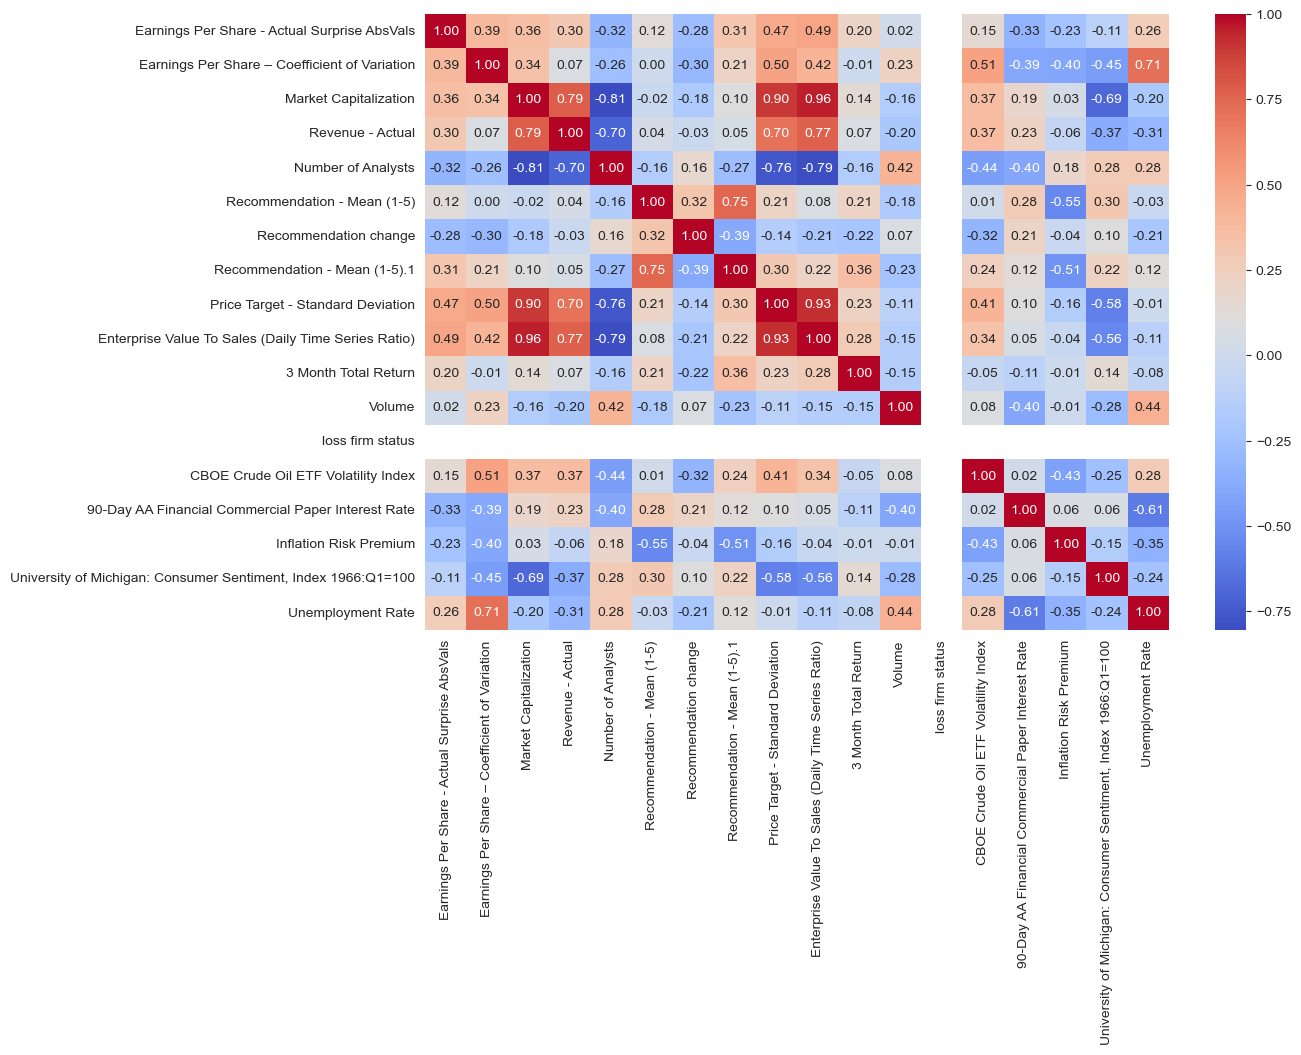

In [19]:
#for_rf = df_accuracy_new.iloc[:25,:]
for_cm = rescale[rescale['Instrument'] == 'AAPL.OQ']
#.iloc[0:38, :]


# print the reversed DataFrame
for_cm

corr_matrix = for_cm.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [20]:
rescale = rescale.dropna()
y = rescale["Earnings Per Share - Actual Surprise AbsVals"]
#X = df_accuracy_new[['Revenue - Actual', 'Net Income after Tax']]
X = rescale.iloc[:,n:]
#X = rescale[X_var_names]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Earnings Per Share - Actual Surprise AbsVals   R-squared:                       0.054
Model:                                                      OLS   Adj. R-squared:                  0.054
Method:                                           Least Squares   F-statistic:                     65.19
Date:                                          Sun, 05 Mar 2023   Prob (F-statistic):          8.55e-206
Time:                                                  19:21:45   Log-Likelihood:                -90358.
No. Observations:                                         18117   AIC:                         1.808e+05
Df Residuals:                                             18100   BIC:                         1.809e+05
Df Model:                                                    16                                         
Covariance Type:                                      nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                           -62.0880      8.677     -7.155      0.000     -79.096     -45.080
Earnings Per Share – Coefficient of Variation                   228.1955     21.784     10.475      0.000     185.496     270.895
Market Capitalization                                            -9.5858      8.793     -1.090      0.276     -26.821       7.650
Revenue - Actual                                                 -7.1154      4.475     -1.590      0.112     -15.887       1.656
Number of Analysts                                              -17.8038      1.907     -9.338      0.000     -21.541     -14.067
Recommendation - Mean (1-5)                                       4.2498      2.338      1.818      0.069      -0.333       8.833
Recommendation change                                           -15.3795      3.468     -4.435      0.000     -22.176      -8.583
Recommendation - Mean (1-5).1                                    -9.2240      2.390     -3.860      0.000     -13.908      -4.540
Price Target - Standard Deviation                                -2.6555     12.469     -0.213      0.831     -27.096      21.785
Enterprise Value To Sales (Daily Time Series Ratio)              92.9343     22.814      4.074      0.000      48.217     137.651
3 Month Total Return                                             32.9408      5.951      5.536      0.000      21.277      44.605
Volume                                                           84.9344     16.445      5.165      0.000      52.700     117.168
loss firm status                                                 24.0247      1.015     23.668      0.000      22.035      26.014
CBOE Crude Oil ETF Volatility Index                               0.9398      1.813      0.518      0.604      -2.614       4.493
90-Day AA Financial Commercial Paper Interest Rate               -3.2600      1.438     -2.267      0.023      -6.079      -0.441
Inflation Risk Premium                                           -5.8997      1.640     -3.598      0.000      -9.113      -2.686
University of Michigan: Consumer Sentiment, Index 1966:Q1=100    -5.4213      1.076     -5.037      0.000      -7.531      -3.312
Unemployment Rate                                                 6.6472      2.032      3.270      0.001       2.663      10.631
===================================================================

#### OLS Pooled Regression

# with grouping


In [21]:
from statsmodels.iolib.summary2 import summary_col
# Split the DataFrame into groups based on the stocks
#df = rescale[rescale['GICS Industry Group Name'] == 'Technology Hardware & Equipment']
groups = rescale.groupby('Instrument')

# Define a function to perform OLS regression on each group
def ols_regression(group):
    # Define the dependent and independent variables
    if len(group) < 2:
        return None
    y = group['Earnings Per Share - Actual Surprise AbsVals']
    #X = group[X_var_names]
    X = group.iloc[:,n:]

    # Add a constant to the independent variables
    X = sm.add_constant(X)

    # Fit the OLS model and return the results
    model = sm.OLS(y, X).fit()
    return model

# Apply the function to each group of data
results = groups.apply(ols_regression)
results = results.dropna()

models = results.tolist()
summary = summary_col(models, stars=True, float_format='%0.2f', model_names=results.index.tolist())

# Print the combined summary table
summary

C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1687: Runtim

,A.N,AAL.OQ,AAP.N,AAPL.OQ,ABBV.N,ABC.N,ABT.N,ACGL.OQ,ACN.N,ADBE.OQ,ADI.OQ,ADM.N,ADP.OQ,ADSK.OQ,AEE.N,AEP.OQ,AES.N,AFL.N,AIG.N,AIZ.N,AJG.N,AKAM.OQ,ALB.N,ALGN.OQ,ALK.N,ALL.N,AMAT.OQ,AMD.OQ,AME.N,AMGN.OQ,AMP.N,AMT.N,AMZN.OQ,ANSS.OQ,AON.N,AOS.N,APA.OQ,APD.N,APH.N,APTV.N,ARE.N,ATO.N,ATVI.OQ,AVB.N,AVGO.OQ,AVY.N,AWK.N,AXP.N,AZO.N,BA.N,BAC.N,BALL.N,BAX.N,BBWI.N,BBY.N,BDX.N,BEN.N,BFb.N,BIIB.OQ,BIO.N,BK.N,BKNG.OQ,BKR.OQ,BLK.N,BMY.N,BR.N,BRKb.N,BRO.N,BSX.N,BWA.N,BXP.N,C.N,CAG.N,CAH.N,CAT.N,CB.N,CBOE.Z,CBRE.N,CCI.N,CCL.N,CDNS.OQ,CE.N,CF.N,CHD.N,CHRW.OQ,CHTR.OQ,CI.N,CINF.OQ,CL.N,CLX.N,CMA.N,CMCSA.OQ,CME.OQ,CMG.N,CMI.N,CMS.N,CNC.N,CNP.N,COF.N,COO.N,COP.N,COST.OQ,CPB.N,CPRT.OQ,CPT.N,CRL.N,CRM.N,CSCO.OQ,CSGP.OQ,CSX.OQ,CTAS.OQ,CTRA.N,CTSH.OQ,CVS.N,CVX.N,D.N,DAL.N,DE.N,DG.N,DGX.N,DHI.N,DHR.N,DIS.N,DISH.OQ,DLR.N,DLTR.OQ,DOV.N,DPZ.N,DRI.N,DTE.N,DUK.N,DVA.N,DVN.N,DXC.N,DXCM.OQ,EA.OQ,EBAY.OQ,ECL.N,ED.N,EFX.N,EIX.N,EL.N,ELV.N,EMN.N,EMR.N,ENPH.OQ,EOG.N,EPAM.N,EQIX.OQ,EQR.N,EQT.N,ES.N,ESS.N,ETN.N,ETR.N,EVRG.OQ,EW.N,EXC.OQ,EXPD.OQ,EXPE.OQ,EXR.N,F.N,FANG.OQ,FAST.OQ,FCX.N,FDS.N,FDX.N,FE.N,FFIV.OQ,FIS.N,FISV.OQ,FITB.OQ,FLT.N,FMC.N,FRC.N,FRT.N,FSLR.OQ,FTNT.OQ,GD.N,GE.N,GEN.OQ,GILD.OQ,GIS.N,GL.N,GLW.N,GM.N,GNRC.N,GOOGL.OQ,GPC.N,GRMN.N,GS.N,GWW.N,HAL.N,HAS.OQ,HBAN.OQ,HCA.N,HD.N,HES.N,HIG.N,HII.N,HOLX.OQ,HON.OQ,HPQ.N,HRL.N,HSIC.OQ,HST.OQ,HSY.N,HUM.N,HWM.N,IBM.N,ICE.N,IDXX.OQ,IEX.N,IFF.N,ILMN.OQ,INCY.OQ,INTC.OQ,INTU.OQ,IP.N,IPG.N,IRM.N,ISRG.OQ,IT.N,ITW.N,IVZ.N,J.N,JBHT.OQ,JCI.N,JKHY.OQ,JNJ.N,JNPR.N,JPM.N,K.N,KDP.OQ,KEY.N,KIM.N,KLAC.OQ,KMB.N,KMI.N,KMX.N,KO.N,KR.N,L.N,LEN.N,LH.N,LIN.N,LKQ.OQ,LLY.N,LMT.N,LNC.N,LNT.OQ,LOW.N,LRCX.OQ,LUMN.N,LUV.N,LVS.N,LYB.N,LYV.N,MA.N,MAA.N,MAR.OQ,MAS.N,MCD.N,MCHP.OQ,MCK.N,MCO.N,MDLZ.OQ,MDT.N,MET.N,META.OQ,MGM.N,MHK.N,MKC.N,MKTX.OQ,MLM.N,MMC.N,MMM.N,MNST.OQ,MO.N,MOH.N,MPC.N,MPWR.OQ,MRK.N,MRO.N,MS.N,MSCI.N,MSFT.OQ,MSI.N,MTB.N,MTD.N,MU.OQ,NCLH.N,NDAQ.OQ,NDSN.OQ,NEE.N,NEM.N,NFLX.OQ,NI.N,NKE.N,NOC.N,NOW.N,NRG.N,NSC.N,NTAP.OQ,NTRS.OQ,NUE.N,NVDA.OQ,NVR.N,NWL.OQ,NWS.OQ,NWSA.OQ,NXPI.OQ,O.N,ODFL.OQ,OKE.N,OMC.N,ON.OQ,ORCL.N,ORLY.OQ,OXY.N,PARA.OQ,PAYX.OQ,PCAR.OQ,PCG.N,PEAK.N,PEG.N,PEP.OQ,PFE.N,PFG.OQ,PG.N,PGR.N,PH.N,PHM.N,PKG.N,PKI.N,PLD.N,PM.N,PNC.N,PNR.N,PNW.N,POOL.OQ,PPG.N,PPL.N,PRU.N,PSA.N,PSX.N,PTC.OQ,PWR.N,PXD.N,QCOM.OQ,RCL.N,RE.N,REG.OQ,REGN.OQ,RF.N,RHI.N,RJF.N,RL.N,RMD.N,ROK.N,ROL.N,ROP.N,ROST.OQ,RSG.N,RTX.N,SBAC.OQ,SBNY.OQ,SBUX.OQ,SCHW.N,SEE.N,SHW.N,SIVB.OQ,SJM.N,SLB.N,SNA.N,SNPS.OQ,SO.N,SPG.N,SPGI.N,SRE.N,STE.N,STLD.OQ,STT.N,STX.OQ,STZ.N,SWK.N,SWKS.OQ,SYK.N,SYY.N,T.N,TAP.N,TDG.N,TDY.N,TECH.OQ,TEL.N,TER.OQ,TFC.N,TFX.N,TGT.N,TJX.N,TMO.N,TMUS.OQ,TPR.N,TRGP.N,TRMB.OQ,TROW.OQ,TRV.N,TSCO.OQ,TSLA.OQ,TSN.N,TT.N,TTWO.OQ,TXN.OQ,TXT.N,TYL.N,UAL.OQ,UDR.N,UHS.N,ULTA.OQ,UNH.N,UNP.N,UPS.N,URI.N,USB.N,V.N,VLO.N,VMC.N,VRSK.OQ,VRSN.OQ,VRTX.OQ,VTR.N,VTRS.OQ,VZ.N,WAB.N,WAT.N,WBA.OQ,WBD.OQ,WDC.OQ,WEC.N,WELL.N,WFC.N,WHR.N,WM.N,WMB.N,WMT.N,WRB.N,WRK.N,WST.N,WTW.OQ,WY.N,WYNN.OQ,XEL.OQ,XOM.N,XRAY.OQ,XYL.N,YUM.N,ZBH.N,ZBRA.OQ,ZION.OQ,ZTS.N
const,1127.51,228.96,-1207.42,1403.50,-39.63,491.21,-2135.80***,1045.89,1209.50,-3061.10**,-1891.47*,-2004.42,-2457.40,-580.05,-798.91,-1862.45**,-719.08*,-2648.49*,-1786.04,-654.96,-506.85,2614.91,-2666.73**,-3147.16**,-118.48,-4444.59,-2619.55***,-1449.05**,-3579.94***,-114.61,-4969.26**,-960.36,-213.13,-2626.43**,-2382.55**,-1692.61,-65.87,-625.03,-4540.96***,-860.09***,12432.09,205.22,-3158.99***,-2736.36,-361.63,-2257.17**,-87.83,184.65,-2654.18***,1303.64*,-406.36***,-641.83,32.93,371.98*,3240.57,-4067.10***,1398.38,-385.20,-173.55,-1316.64,-2061.93**,-168.27,-534.20,-2961.87***,-1536.83,1892.72*,-1555.23,-13823.17**,996.40***,422.26,1196.80,79.82,204.23,-1949.17,-3329.63***,769.66**,-1470.16,2107.15**,-846.22,-2465.43***,-655.23,-3973.41***,633.61,595.85,-7156.68***,-183.21,1100.15,1841.42,-534.94,-3003.93***,-1821.18**,-85.84,52.36,136.03,-2818.98***,-411.71,-1695.81*,-665.39,-4879.73***,-698.45,-536.76***,-449.07,-51.92,-2335.12**,-19395.84,-615.89,547.04,-246.33,-2215.95,-196.75,-1153.85,-872.34,-418.77,-2215.78,

In [23]:
rsquared_values = results.apply(lambda x: x.rsquared)
avg_rsquared = rsquared_values.mean()
print('Average R-squared: {:.2f}'.format(avg_rsquared))

# # Get the p-values for each model
# pvalues = results.apply(lambda x: x.pvalues)
#
# # Calculate the average p-values
# avg_pvalues = pvalues.mean()
#
# # Get the F-tests for each model
# ftests = results.apply(lambda x: x.f_test([1,0]))
#
# # Calculate the average F-tests
# avg_fvalue = ftests.apply(lambda x: x.fvalue).mean()
# avg_f_pvalue = ftests.apply(lambda x: x.pvalue).mean()
#
# print('Average p-values:')
# print(avg_pvalues)
# print('\nAverage F-value:')
# print(avg_fvalue)
# print('\nAverage F-test p-value:')
# print(avg_f_pvalue)


# Get the coefficient estimates for each model
coef_values = results.apply(lambda x: x.params)

# Calculate the average coefficient estimates
avg_coef = coef_values.mean()

# Get the standard errors for each model
se_values = results.apply(lambda x: x.bse)

# Calculate the average standard errors
avg_se = se_values.mean()

print('Average coefficient estimates:')
print(avg_coef)
print('\nAverage standard errors:')
print(avg_se)


Average R-squared: 0.63


ValueError: wrong shape for coefs